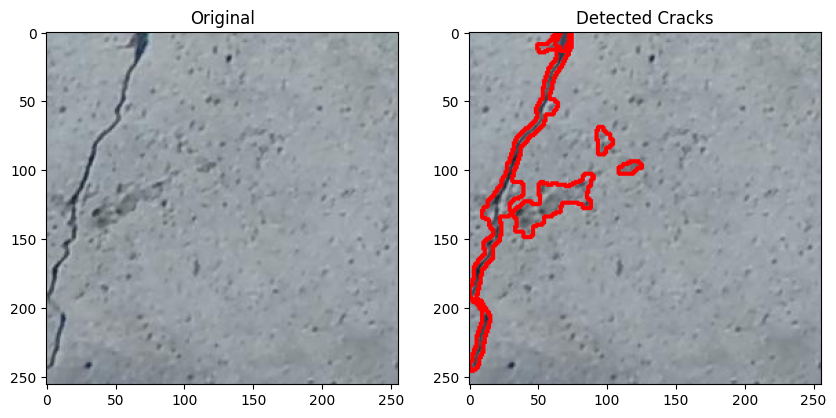

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the wall image
image = cv2.imread(r'D:\Civil_EL\Walls\Cracked\7139-202.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Detect edges using Canny
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

# Optional: Dilate to thicken edges
kernel = np.ones((3, 3), np.uint8)
dilated = cv2.dilate(edges, kernel, iterations=1)

# Optional: Morphological closing to connect small gaps
closed = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)

# Find contours (potential crack shapes)
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = image.copy()

# Filter and draw only long/narrow contours
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 100:  # tweak this threshold
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = w / float(h + 1)
        if aspect_ratio < 4:  # prefer long vertical/horizontal shapes
            cv2.drawContours(output, [cnt], -1, (0, 0, 255), 2)

# Show result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Detected Cracks')
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.show()
